In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import pandas as pd
import numpy as np
#warnings.filterwarnings("ignore")

# Datensatz einlesen

In [5]:
df =pd.read_csv(r'C:\Tensorflow Object Detection\TFODCourse\covid 19\covid_de.csv')

# Analyse der Datensätze

In [6]:
df.shape

(1643636, 8)

In [7]:
df.head(4)

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1


# Es wird neue Spalten zu Daten hinzugefügt bzw. Bevölkerungsdichte füe die Bündesländer und Stadtkreise

In [37]:
# Es wird neue Spalten zu Daten hinzugefügt bzw. Bevölkerungsdichte füe die Landkreise und Stadtkreise
conditions = [
    (df['county']=='LK Alb-Donau-Kreis'),
(df['county']=='LK Biberach'),
(df['county']=='LK Bodenseekreis'),
(df['county']=='LK Boeblingen'),
(df['county']=='LK Breisgau-Hochschwarzwald'),
(df['county']=='LK Calw'),
(df['county']=='LK Emmendingen'),
(df['county']=='LK Enzkreis'),
(df['county']=='LK Esslingen'),
(df['county']=='LK Freudenstadt'),
(df['county']=='LK Goeppingen'),
(df['county']=='LK Heidenheim'),
(df['county']=='LK Heilbronn'),
(df['county']=='LK Hohenlohekreis'),
(df['county']=='LK Karlsruhe'),
(df['county']=='LK Konstanz'),
(df['county']=='LK Loerrach'),
(df['county']=='LK Ludwigsburg'),
(df['county']=='LK Main-Tauber-Kreis'),
(df['county']=='LK Neckar-Odenwald-Kreis'),
(df['county']=='LK Ortenaukreis'),
(df['county']=='LK Ostalbkreis'),
(df['county']=='LK Rastatt'),
(df['county']=='LK Ravensburg'),
(df['county']=='LK Rems-Murr-Kreis'),
(df['county']=='LK Reutlingen'),
(df['county']=='LK Rhein-Neckar-Kreis'),
(df['county']=='LK Rottweil'),
(df['county']=='LK Schwaebisch Hall'),
(df['county']=='LK Schwarzwald-Baar-Kreis'),
(df['county']=='LK Sigmaringen'),
(df['county']=='LK Tuebingen'),
(df['county']=='LK Tuttlingen'),
(df['county']=='LK Waldshut'),
(df['county']=='LK Zollernalbkreis'),
(df['county']=='SK Baden-Baden'),
(df['county']=='SK Freiburg i.Breisgau'),
(df['county']=='SK Heidelberg'),
(df['county']=='SK Heilbronn'),
(df['county']=='SK Karlsruhe'),
(df['county']=='SK Mannheim'),
(df['county']=='SK Pforzheim'),
(df['county']=='SK Stuttgart'),
(df['county']=='SK Ulm'),
(df['county']=='LK Aichach-Friedberg'),
(df['county']=='LK Altoetting'),
(df['county']=='LK Amberg-Sulzbach'),
(df['county']=='LK Ansbach'),
(df['county']=='LK Aschaffenburg'),
(df['county']=='LK Augsburg'),
(df['county']=='LK Bad Kissingen'),
(df['county']=='LK Bad Toelz-Wolfratshausen'),
(df['county']=='LK Bamberg'),
(df['county']=='LK Bayreuth'),
(df['county']=='LK Berchtesgadener Land'),
(df['county']=='LK Cham'),
(df['county']=='LK Coburg'),
(df['county']=='LK Dachau'),
(df['county']=='LK Deggendorf'),
(df['county']=='LK Dillingen a.d.Donau'),
(df['county']=='LK Dingolfing-Landau'),
(df['county']=='LK Donau-Ries'),
(df['county']=='LK Ebersberg'),
(df['county']=='LK Eichstaett'),
(df['county']=='LK Erding'),
(df['county']=='LK Erlangen-Hoechstadt'),
(df['county']=='LK Forchheim'),
(df['county']=='LK Freising'),
(df['county']=='LK Freyung-Grafenau'),
(df['county']=='LK Fuerstenfeldbruck'),
(df['county']=='LK Fuerth'),
(df['county']=='LK Garmisch-Partenkirchen'),
(df['county']=='LK Guenzburg'),
(df['county']=='LK Hassberge'),
(df['county']=='LK Hof'),
(df['county']=='LK Kelheim'),
(df['county']=='LK Kitzingen'),
(df['county']=='LK Kronach'),
(df['county']=='LK Kulmbach'),
(df['county']=='LK Landsberg a.Lech'),
(df['county']=='LK Landshut'),
(df['county']=='LK Lichtenfels'),
(df['county']=='LK Lindau'),
(df['county']=='LK Main-Spessart'),
(df['county']=='LK Miesbach'),
(df['county']=='LK Miltenberg'),
(df['county']=='LK Muehldorf a.Inn'),
(df['county']=='LK Muenchen'),
(df['county']=='LK Neu-Ulm'),
(df['county']=='LK Neuburg-Schrobenhausen'),
(df['county']=='LK Neumarkt i.d.OPf.'),
(df['county']=='LK Neustadt a.d.Aisch-Bad Windsheim'),
(df['county']=='LK Neustadt a.d.Waldnaab'),
(df['county']=='LK Nuernberger Land'),
(df['county']=='LK Oberallgaeu'),
(df['county']=='LK Ostallgaeu'),
(df['county']=='LK Passau'),
(df['county']=='LK Pfaffenhofen a.d.Ilm'),
(df['county']=='LK Regen'),
(df['county']=='LK Regensburg'),
(df['county']=='LK Rhoen-Grabfeld'),
(df['county']=='LK Rosenheim'),
(df['county']=='LK Roth'),
(df['county']=='LK Rottal-Inn'),
(df['county']=='LK Schwandorf'),
(df['county']=='LK Schweinfurt'),
(df['county']=='LK Starnberg'),
(df['county']=='LK Straubing-Bogen'),
(df['county']=='LK Tirschenreuth'),
(df['county']=='LK Traunstein'),
(df['county']=='LK Unterallgaeu'),
(df['county']=='LK Weilheim-Schongau'),
(df['county']=='LK Weissenburg-Gunzenhausen'),
(df['county']=='LK Wuerzburg'),
(df['county']=='LK Wunsiedel i.Fichtelgebirge'),
(df['county']=='SK Amberg'),
(df['county']=='SK Ansbach'),
(df['county']=='SK Aschaffenburg'),
(df['county']=='SK Augsburg'),
(df['county']=='SK Bamberg'),
(df['county']=='SK Bayreuth'),
(df['county']=='SK Coburg'),
(df['county']=='SK Erlangen'),
(df['county']=='SK Fuerth'),
(df['county']=='SK Hof'),
(df['county']=='SK Ingolstadt'),
(df['county']=='SK Kaufbeuren'),
(df['county']=='SK Kempten'),
(df['county']=='SK Landshut'),
(df['county']=='SK Memmingen'),
(df['county']=='SK Muenchen'),
(df['county']=='SK Nuernberg'),
(df['county']=='SK Passau'),
(df['county']=='SK Regensburg'),
(df['county']=='SK Rosenheim'),
(df['county']=='SK Schwabach'),
(df['county']=='SK Schweinfurt'),
(df['county']=='SK Straubing'),
(df['county']=='SK Weiden i.d.OPf.'),
(df['county']=='SK Wuerzburg'),
(df['county']=='SK Berlin Charlottenburg-Wilmersdorf'),
(df['county']=='SK Berlin Friedrichshain-Kreuzberg'),
(df['county']=='SK Berlin Lichtenberg'),
(df['county']=='SK Berlin Marzahn-Hellersdorf'),
(df['county']=='SK Berlin Mitte'),
(df['county']=='SK Berlin Neukoelln'),
(df['county']=='SK Berlin Pankow'),
(df['county']=='SK Berlin Reinickendorf'),
(df['county']=='SK Berlin Spandau'),
(df['county']=='SK Berlin Steglitz-Zehlendorf'),
(df['county']=='SK Berlin Tempelhof-Schoeneberg'),
(df['county']=='SK Berlin Treptow-Koepenick'),
(df['county']=='LK Barnim'),
(df['county']=='LK Dahme-Spreewald'),
(df['county']=='LK Elbe-Elster'),
(df['county']=='LK Havelland'),
(df['county']=='LK Maerkisch-Oderland'),
(df['county']=='LK Oberhavel'),
(df['county']=='LK Oberspreewald-Lausitz'),
(df['county']=='LK Oder-Spree'),
(df['county']=='LK Ostprignitz-Ruppin'),
(df['county']=='LK Potsdam-Mittelmark'),
(df['county']=='LK Prignitz'),
(df['county']=='LK Spree-Neisse'),
(df['county']=='LK Teltow-Flaeming'),
(df['county']=='LK Uckermark'),
(df['county']=='SK Brandenburg a.d.Havel'),
(df['county']=='SK Cottbus'),
(df['county']=='SK Frankfurt (Oder)'),
(df['county']=='SK Potsdam'),
(df['county']=='SK Bremen'),
(df['county']=='SK Bremerhaven'),
(df['county']=='SK Hamburg'),
(df['county']=='LK Bergstrasse'),
(df['county']=='LK Darmstadt-Dieburg'),
(df['county']=='LK Fulda'),
(df['county']=='LK Giessen'),
(df['county']=='LK Gross-Gerau'),
(df['county']=='LK Hersfeld-Rotenburg'),
(df['county']=='LK Hochtaunuskreis'),
(df['county']=='LK Kassel'),
(df['county']=='LK Lahn-Dill-Kreis'),
(df['county']=='LK Limburg-Weilburg'),
(df['county']=='LK Main-Kinzig-Kreis'),
(df['county']=='LK Main-Taunus-Kreis'),
(df['county']=='LK Marburg-Biedenkopf'),
(df['county']=='LK Odenwaldkreis'),
(df['county']=='LK Offenbach'),
(df['county']=='LK Rheingau-Taunus-Kreis'),
(df['county']=='LK Schwalm-Eder-Kreis'),
(df['county']=='LK Vogelsbergkreis'),
(df['county']=='LK Waldeck-Frankenberg'),
(df['county']=='LK Werra-Meissner-Kreis'),
(df['county']=='LK Wetteraukreis'),
(df['county']=='SK Darmstadt'),
(df['county']=='SK Frankfurt am Main'),
(df['county']=='SK Kassel'),
(df['county']=='SK Offenbach'),
(df['county']=='SK Wiesbaden'),
(df['county']=='LK Ludwigslust-Parchim'),
(df['county']=='LK Mecklenburgische Seenplatte'),
(df['county']=='LK Nordwestmecklenburg'),
(df['county']=='LK Rostock'),
(df['county']=='LK Vorpommern-Greifswald'),
(df['county']=='LK Vorpommern-Ruegen'),
(df['county']=='SK Rostock'),
(df['county']=='SK Schwerin'),
(df['county']=='LK Ammerland'),
(df['county']=='LK Aurich'),
(df['county']=='LK Celle'),
(df['county']=='LK Cloppenburg'),
(df['county']=='LK Cuxhaven'),
(df['county']=='LK Diepholz'),
(df['county']=='LK Emsland'),
(df['county']=='LK Friesland'),
(df['county']=='LK Gifhorn'),
(df['county']=='LK Goettingen'),
(df['county']=='LK Goslar'),
(df['county']=='LK Grafschaft Bentheim'),
(df['county']=='LK Hameln-Pyrmont'),
(df['county']=='LK Harburg'),
(df['county']=='LK Heidekreis'),
(df['county']=='LK Helmstedt'),
(df['county']=='LK Hildesheim'),
(df['county']=='LK Holzminden'),
(df['county']=='LK Leer'),
(df['county']=='LK Luechow-Dannenberg'),
(df['county']=='LK Lueneburg'),
(df['county']=='LK Nienburg (Weser)'),
(df['county']=='LK Northeim'),
(df['county']=='LK Oldenburg'),
(df['county']=='LK Osnabrueck'),
(df['county']=='LK Osterholz'),
(df['county']=='LK Peine'),
(df['county']=='LK Rotenburg (Wuemme)'),
(df['county']=='LK Schaumburg'),
(df['county']=='LK Stade'),
(df['county']=='LK Uelzen'),
(df['county']=='LK Vechta'),
(df['county']=='LK Verden'),
(df['county']=='LK Wesermarsch'),
(df['county']=='LK Wittmund'),
(df['county']=='LK Wolfenbuettel'),
(df['county']=='Region Hannover'),
(df['county']=='SK Braunschweig'),
(df['county']=='SK Delmenhorst'),
(df['county']=='SK Emden'),
(df['county']=='SK Oldenburg'),
(df['county']=='SK Osnabrueck'),
(df['county']=='SK Salzgitter'),
(df['county']=='SK Wilhelmshaven'),
(df['county']=='SK Wolfsburg'),
(df['county']=='LK Borken'),
(df['county']=='LK Coesfeld'),
(df['county']=='LK Dueren'),
(df['county']=='LK Ennepe-Ruhr-Kreis'),
(df['county']=='LK Euskirchen'),
(df['county']=='LK Guetersloh'),
(df['county']=='LK Heinsberg'),
(df['county']=='LK Herford'),
(df['county']=='LK Hochsauerlandkreis'),
(df['county']=='LK Hoexter'),
(df['county']=='LK Kleve'),
(df['county']=='LK Lippe'),
(df['county']=='LK Maerkischer Kreis'),
(df['county']=='LK Mettmann'),
(df['county']=='LK Minden-Luebbecke'),
(df['county']=='LK Oberbergischer Kreis'),
(df['county']=='LK Olpe'),
(df['county']=='LK Paderborn'),
(df['county']=='LK Recklinghausen'),
(df['county']=='LK Rhein-Erft-Kreis'),
(df['county']=='LK Rhein-Kreis Neuss'),
(df['county']=='LK Rhein-Sieg-Kreis'),
(df['county']=='LK Rheinisch-Bergischer Kreis'),
(df['county']=='LK Siegen-Wittgenstein'),
(df['county']=='LK Soest'),
(df['county']=='LK Steinfurt'),
(df['county']=='LK Unna'),
(df['county']=='LK Viersen'),
(df['county']=='LK Warendorf'),
(df['county']=='LK Wesel'),
(df['county']=='SK Bielefeld'),
(df['county']=='SK Bochum'),
(df['county']=='SK Bonn'),
(df['county']=='SK Bottrop'),
(df['county']=='SK Dortmund'),
(df['county']=='SK Duesseldorf'),
(df['county']=='SK Duisburg'),
(df['county']=='SK Essen'),
(df['county']=='SK Gelsenkirchen'),
(df['county']=='SK Hagen'),
(df['county']=='SK Hamm'),
(df['county']=='SK Herne'),
(df['county']=='SK Koeln'),
(df['county']=='SK Krefeld'),
(df['county']=='SK Leverkusen'),
(df['county']=='SK Moenchengladbach'),
(df['county']=='SK Muelheim a.d.Ruhr'),
(df['county']=='SK Muenster'),
(df['county']=='SK Oberhausen'),
(df['county']=='SK Remscheid'),
(df['county']=='SK Solingen'),
(df['county']=='SK Wuppertal'),
(df['county']=='StadtRegion Aachen'),
(df['county']=='LK Ahrweiler'),
(df['county']=='LK Altenkirchen'),
(df['county']=='LK Alzey-Worms'),
(df['county']=='LK Bad Duerkheim'),
(df['county']=='LK Bad Kreuznach'),
(df['county']=='LK Bernkastel-Wittlich'),
(df['county']=='LK Birkenfeld'),
(df['county']=='LK Bitburg-Pruem'),
(df['county']=='LK Cochem-Zell'),
(df['county']=='LK Donnersbergkreis'),
(df['county']=='LK Germersheim'),
(df['county']=='LK Kaiserslautern'),
(df['county']=='LK Kusel'),
(df['county']=='LK Mainz-Bingen'),
(df['county']=='LK Mayen-Koblenz'),
(df['county']=='LK Neuwied'),
(df['county']=='LK Rhein-Hunsrueck-Kreis'),
(df['county']=='LK Rhein-Lahn-Kreis'),
(df['county']=='LK Rhein-Pfalz-Kreis'),
(df['county']=='LK Suedliche Weinstrasse'),
(df['county']=='LK Suedwestpfalz'),
(df['county']=='LK Trier-Saarburg'),
(df['county']=='LK Vulkaneifel'),
(df['county']=='LK Westerwaldkreis'),
(df['county']=='SK Frankenthal'),
(df['county']=='SK Kaiserslautern'),
(df['county']=='SK Koblenz'),
(df['county']=='SK Landau i.d.Pfalz'),
(df['county']=='SK Ludwigshafen'),
(df['county']=='SK Mainz'),
(df['county']=='SK Neustadt a.d.Weinstrasse'),
(df['county']=='SK Pirmasens'),
(df['county']=='SK Speyer'),
(df['county']=='SK Trier'),
(df['county']=='SK Worms'),
(df['county']=='SK Zweibruecken'),
(df['county']=='LK Merzig-Wadern'),
(df['county']=='LK Neunkirchen'),
(df['county']=='LK Saar-Pfalz-Kreis'),
(df['county']=='LK Saarlouis'),
(df['county']=='LK Sankt Wendel'),
(df['county']=='LK Stadtverband Saarbruecken'),
(df['county']=='LK Bautzen'),
(df['county']=='LK Erzgebirgskreis'),
(df['county']=='LK Goerlitz'),
(df['county']=='LK Leipzig'),
(df['county']=='LK Meissen'),
(df['county']=='LK Mittelsachsen'),
(df['county']=='LK Nordsachsen'),
(df['county']=='LK Saechsische Schweiz-Osterzgebirge'),
(df['county']=='LK Vogtlandkreis'),
(df['county']=='LK Zwickau'),
(df['county']=='SK Chemnitz'),
(df['county']=='SK Dresden'),
(df['county']=='SK Leipzig'),
(df['county']=='LK Altmarkkreis Salzwedel'),
(df['county']=='LK Anhalt-Bitterfeld'),
(df['county']=='LK Boerde'),
(df['county']=='LK Burgenlandkreis'),
(df['county']=='LK Harz'),
(df['county']=='LK Jerichower Land'),
(df['county']=='LK Mansfeld-Suedharz'),
(df['county']=='LK Saalekreis'),
(df['county']=='LK Salzlandkreis'),
(df['county']=='LK Stendal'),
(df['county']=='LK Wittenberg'),
(df['county']=='SK Dessau-Rosslau'),
(df['county']=='SK Halle'),
(df['county']=='SK Magdeburg'),
(df['county']=='LK Dithmarschen'),
(df['county']=='LK Herzogtum Lauenburg'),
(df['county']=='LK Nordfriesland'),
(df['county']=='LK Ostholstein'),
(df['county']=='LK Pinneberg'),
(df['county']=='LK Ploen'),
(df['county']=='LK Rendsburg-Eckernfoerde'),
(df['county']=='LK Schleswig-Flensburg'),
(df['county']=='LK Segeberg'),
(df['county']=='LK Steinburg'),
(df['county']=='LK Stormarn'),
(df['county']=='SK Flensburg'),
(df['county']=='SK Kiel'),
(df['county']=='SK Luebeck'),
(df['county']=='SK Neumuenster'),
(df['county']=='LK Altenburger Land'),
(df['county']=='LK Eichsfeld'),
(df['county']=='LK Gotha'),
(df['county']=='LK Greiz'),
(df['county']=='LK Hildburghausen'),
(df['county']=='LK Ilm-Kreis'),
(df['county']=='LK Kyffhaeuserkreis'),
(df['county']=='LK Nordhausen'),
(df['county']=='LK Saale-Holzland-Kreis'),
(df['county']=='LK Saale-Orla-Kreis'),
(df['county']=='LK Saalfeld-Rudolstadt'),
(df['county']=='LK Schmalkalden-Meiningen'),
(df['county']=='LK Soemmerda'),
(df['county']=='LK Sonneberg'),
(df['county']=='LK Unstrut-Hainich-Kreis'),
(df['county']=='LK Wartburgkreis'),
(df['county']=='LK Weimarer Land'),
(df['county']=='SK Eisenach'),
(df['county']=='SK Erfurt'),
(df['county']=='SK Gera'),
(df['county']=='SK Jena'),
(df['county']=='SK Suhl'),
(df['county']=='SK Weimar'),


    ]

# create a list of the values we want to assign for each condition
values = [1358,
1409,
664,
618,
1378,
798,
680,
573,
641,
870,
642,
627,
99,
776,
1084,
817,
806,
686,
1304,
1126,
1860,
1511,
738,
1632,
858,
1092,
1061,
769,
1483,
1025,
1204,
519,
734,
1131,
917,
140,
153,
108,
99,
173,
144,
98,
207,
118,
173,
195,
82,
94,
249,
237,
90,
115,
126,
81,
126,
83,
147,
265,
139,
122,
110,
104,
258,
109,
159,
234,
181,
225,
79,
504,
383,
87,
167,
88,
109,
115,
133,
102,
109,
150,
119,
128,
252,
95,
115,
180,
144,
528,
340,
132,
99,
80,
66,
214,
101,
100,
126,
168,
79,
139,
78,
182,
142,
95,
101,
137,
280,
84,
66,
116,
118,
140,
98,
168,
120,
842,
418,
1137,
2020,
1416,
1117,
851,
1462,
2028,
790,
1030,
1109,
1093,
1115,
629,
4777,
2781,
759,
1897,
1707,
1004,
1497,
707,
606,
1460,
5309,
1531,
5784,
4368,
9585,
14201,
3971,
2977,
4927,
3025,
6611,
1625,
125,
75,
54,
94,
91,
118,
89,
79,
39,
84,
36,
69,
81,
39,
314,
604,
391,
956,
1743,
1211,
2443,
376,
452,
162,
317,
609,
110,
492,
183,
238,
233,
301,
1073,
196,
155,
999,
231,
117,
72,
85,
98,
280,
1310,
3074,
1893,
2902,
1366,
45,
47,
74,
63,
60,
70,
1153,
733,
171,
147,
116,
120,
96,
109,
113,
162,
113,
186,
141,
140,
187,
204,
75,
135,
229,
102,
157,
40,
139,
87,
104,
123,
169,
175,
252,
79,
234,
162,
64,
176,
174,
108,
87,
166,
505,
1298,
1244,
444,
1642,
1379,
466,
711,
609,
261,
198,
281,
791,
155,
377,
407,
556,
133,
117,
253,
279,
387,
1192,
269,
296,
188,
247,
807,
668,
784,
521,
648,
244,
227,
250,
727,
531,
211,
441,
1291,
2510,
2337,
1168,
2096,
2860,
2141,
2771,
2474,
1176,
795,
3043,
2686,
1651,
2076,
1531,
1869,
1040,
2734,
1494,
1778,
2109,
788,
165,
201,
220,
223,
183,
96,
104,
61,
89,
117,
278,
166,
122,
349,
262,
292,
104,
156,
507,
173,
99,
136,
67,
204,
1114,
716,
1085,
565,
2221,
2236,
455,
656,
1187,
952,
768,
484,
186,
529,
341,
425,
183,
1078,
125,
183,
120,
156,
166,
144,
97,
148,
160,
332,
1114,
1695,
1992,
37,
111,
73,
129,
103,
57,
95,
130,
135,
47,
66,
336,
1770,
1187,
93,
105,
80,
144,
473,
119,
125,
97,
206,
124,
319,
1582,
2080,
1011,
1119,
157,
106,
144,
115,
67,
132,
72,
117,
102,
70,
102,
100,
86,
125,
104,
94,
102,
406,
793,
612,
970,
260,
772,
]

df['density_county'] = np.select(conditions, values).astype(int)



In [38]:
# Es wird neue Spalten zu Daten hinzugefügt bzw. Bevölkerungsdichte füe die Bündesländer
conditions = [
    (df['state'] == 'Baden-Wuerttemberg'),
    (df['state'] == 'Berlin'),
    (df['state'] =='Nordrhein-Westfalen'),
    (df['state'] == 'Bayern'),
    (df['state'] == 'Thueringen'),
    (df['state'] == 'Brandenburg'),
    (df['state'] == 'Bremen'),
    (df['state'] == 'Hessen'),
    (df['state'] == 'Mecklenburg-Vorpommern'),
    (df['state'] == 'Niedersachsen'),
    (df['state'] == 'Rheinland-Pfalz'),
    (df['state'] == 'Saarland'),
    (df['state'] == 'Sachsen'),
    (df['state'] == 'Sachsen-Anhalt'),
    (df['state'] == 'Schleswig-Holstein'),
    (df['state'] == 'Hamburg'),

    ]
#Quelle:https://de.statista.com/statistik/daten/studie/1242/umfrage/bevoelkerungsdichte-in-deutschland-nach-bundeslaendern/

values = ['311','4090','526' ,'186','132','85','1624','298','69','168','206','384','221','107','184','2426']

df['density_state'] = np.select(conditions, values).astype(int)

In [39]:
df.head(4)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1,1358,311
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1,1358,311
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1,1358,311
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1,1358,311


# Untersuchung der fehlenden Werte im Datasatz

In [40]:
df.isnull().sum()

state                 0
county                0
age_group          7992
gender            57337
date                  0
cases                 0
deaths                0
recovered             0
density_county        0
density_state         0
dtype: int64

# gender-fehlende Werte bzw. NAN werden mit zufälligen Werten (M oder F) ausgefühlt

In [41]:
fill_list=['M','F']
df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))

# age_group-fehlende Werte bzw. NAN werden mit zufälligen Werten ('00-04','05-14','15-34','35-59','60-79','80-99') ausgefühlt

In [42]:
fill_list=['00-04','05-14','15-34','35-59','60-79','80-99']
df['age_group'] = df['age_group'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))

# Durschschnitt der Altergrupper wird berechnet und durch die Zahlen ersetzt

In [43]:
df['age_group'] =df['age_group'].replace(['00-04','05-14', '15-34','35-59','60-79','80-99'],
                                         ['2','9', '24','47','70','90']).astype(int)

In [44]:
df.head(4)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311


# dataframe enthält keine fehlende Werte

In [45]:
df.isnull().sum()

state             0
county            0
age_group         0
gender            0
date              0
cases             0
deaths            0
recovered         0
density_county    0
density_state     0
dtype: int64

Es wird die Anzahl die Todesfälle und Genesen angepasst, in dem die einzelne Fälle für genesene Fälle und Todesfälle in eine Zeile übertragen und die aktuelle Fälle gelöscht werden

In [46]:
# Es wird die Anzahl die Todesfälle und Genesen angepasst
df_columns = df.columns.tolist()
index_deaths = df_columns.index("deaths")
index_recovered = df_columns.index("recovered")
new_data = []
for index, row in df.iterrows():
	new_row = row.tolist()
	new_row[index_deaths] = 1
	new_row[index_recovered] = 0
	for i in range(0, row['deaths']):
		new_data.append(new_row)
	new_row = row.tolist()
	new_row[index_deaths] = 0
	new_row[index_recovered] = 1
	for i in range(0, row['recovered']):
		new_data.append(new_row)
covid= pd.DataFrame(new_data, columns=df_columns)

In [47]:
covid

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-22,1,0,1,1358,311
...,...,...,...,...,...,...,...,...,...,...
10880347,Thueringen,SK Weimar,90,M,2022-01-28,1,0,1,772,132
10880348,Thueringen,SK Weimar,47,F,2021-12-01,1,0,1,772,132
10880349,Thueringen,SK Weimar,2,F,2021-12-11,1,0,1,772,132
10880350,Thueringen,SK Weimar,2,F,2021-12-23,1,0,1,772,132


In [48]:
#print('Current count of patients:',covid['cases_org'].count())
print('Number of Dead Patients:', covid[covid['deaths']==1]['deaths'].count())
#print('Number of Recovered Patients:',covid[covid['recovered_org']==1]['deaths_org'].count())

Number of Dead Patients: 122618


Visualisierung Anteil der Todesfälle und genesenen Fälle in DE

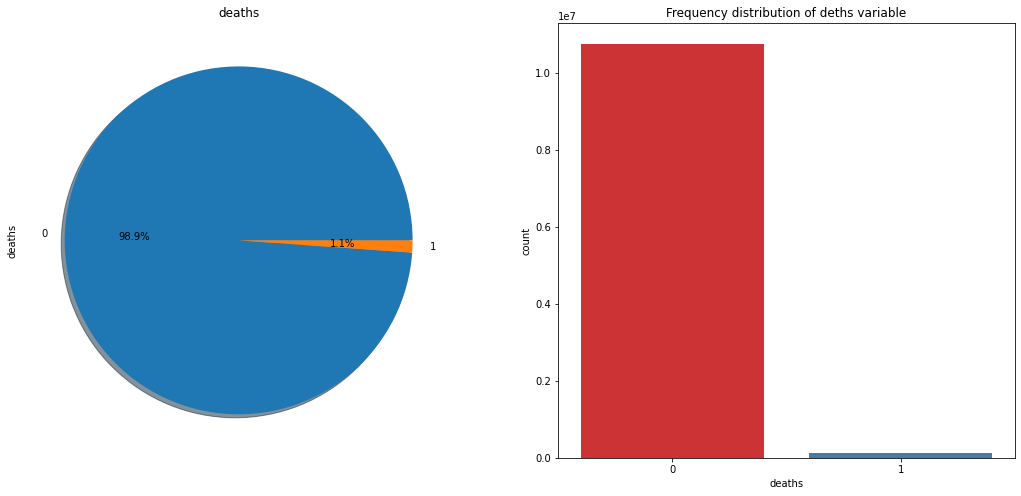

In [49]:

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = covid['deaths'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('deaths')

ax[1] = sns.countplot(x="deaths", data=covid, palette="Set1")
ax[1].set_title("Frequency distribution of deths variable")

plt.show()

In [50]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880352 entries, 0 to 10880351
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   state           object
 1   county          object
 2   age_group       int64 
 3   gender          object
 4   date            object
 5   cases           int64 
 6   deaths          int64 
 7   recovered       int64 
 8   density_county  int64 
 9   density_state   int64 
dtypes: int64(6), object(4)
memory usage: 830.1+ MB


In [51]:
covid.head(4)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311


In [52]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
le3.fit(covid['gender'])
covid['geschlecht_org']=le3.transform(covid['gender'])


In [55]:
covid

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311,0
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311,0
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311,0
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311,0
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-22,1,0,1,1358,311,0
...,...,...,...,...,...,...,...,...,...,...,...
10880347,Thueringen,SK Weimar,90,M,2022-01-28,1,0,1,772,132,1
10880348,Thueringen,SK Weimar,47,F,2021-12-01,1,0,1,772,132,0
10880349,Thueringen,SK Weimar,2,F,2021-12-11,1,0,1,772,132,0
10880350,Thueringen,SK Weimar,2,F,2021-12-23,1,0,1,772,132,0


In [56]:
covid['datum'] = pd.to_datetime(covid['date'])
covid['datum'] = covid[['datum']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [57]:
covid.head(4)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311,0,1585267200
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311,0,1585353600
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311,0,1585872000
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311,0,1602979200


In [58]:
covid

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311,0,1585267200
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311,0,1585353600
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311,0,1585872000
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311,0,1602979200
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-22,1,0,1,1358,311,0,1603324800
...,...,...,...,...,...,...,...,...,...,...,...,...
10880347,Thueringen,SK Weimar,90,M,2022-01-28,1,0,1,772,132,1,1643328000
10880348,Thueringen,SK Weimar,47,F,2021-12-01,1,0,1,772,132,0,1638316800
10880349,Thueringen,SK Weimar,2,F,2021-12-11,1,0,1,772,132,0,1639180800
10880350,Thueringen,SK Weimar,2,F,2021-12-23,1,0,1,772,132,0,1640217600


In [ ]:
covid.to_csv('covid_de_28_2_22.csv')